In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_palette('Paired')

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
from os.path import join
print(os.listdir("./"))
path = "./"

# Any results you write to the current directory are saved as output.

['.gitignore', 'README.md', '.git', 'Simple Eda.ipynb', 'survey_results_schema.csv', '.ipynb_checkpoints', 'survey_results_public.csv']


## Reading the data

In [2]:
df = pd.read_csv(join(path, 'survey_results_public.csv'), low_memory=False)

In [3]:
df.head(1)

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy


In [4]:
pd.options.display.max_colwidth = 400
schema = pd.read_csv(join(path, 'survey_results_schema.csv'), low_memory=False)

# Helping functions

In [5]:
def plot_categorical_count(df, column, title='', limit=2, xtick_rotation='horizontal'):
    column_count = df[column].value_counts()[:limit]
    
    fig = plt.figure(figsize=(14, 8))
    sns.barplot(x=column_count.index, y=column_count.values, palette='Paired')
    sns.despine(left=True)
    plt.title(title, fontsize=16)
    plt.xticks(rotation=xtick_rotation)

def plot_heatmap(df, variable):
    l = []
    for name, group in top10_df.groupby('Country'):
        dff = pd.DataFrame(group[variable].value_counts() / group[variable].count()) 
        dff['Country'] = name
        dff['rate'] = dff.index
        l.append(dff)
    fig = plt.figure(figsize=(14, 8))
    df_2 = pd.concat(l)
    dff = df_2.pivot_table(index='Country', columns='rate')
    sns.heatmap(dff, cmap="YlGnBu", linewidths=.3)

# Top 10 Countries 

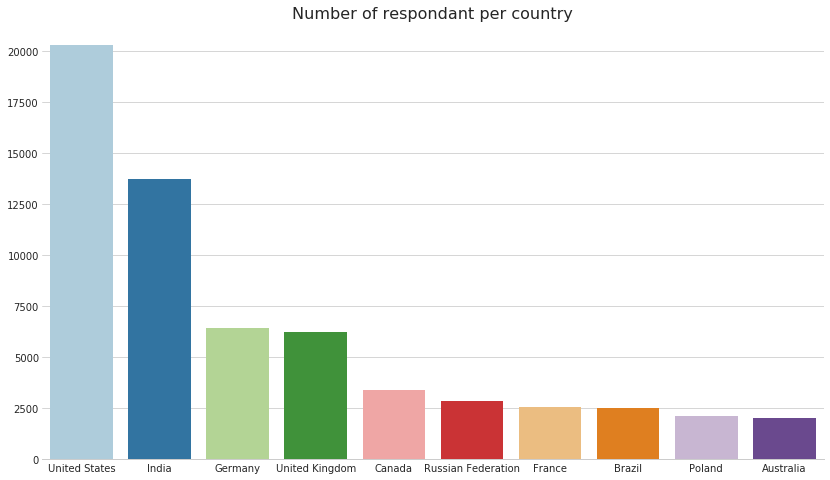

In [6]:
plot_categorical_count(df, column='Country', title='Number of respondant per country', limit=10)

> We can see that the USA is the country with the most respondant

# Hobbiest or Not

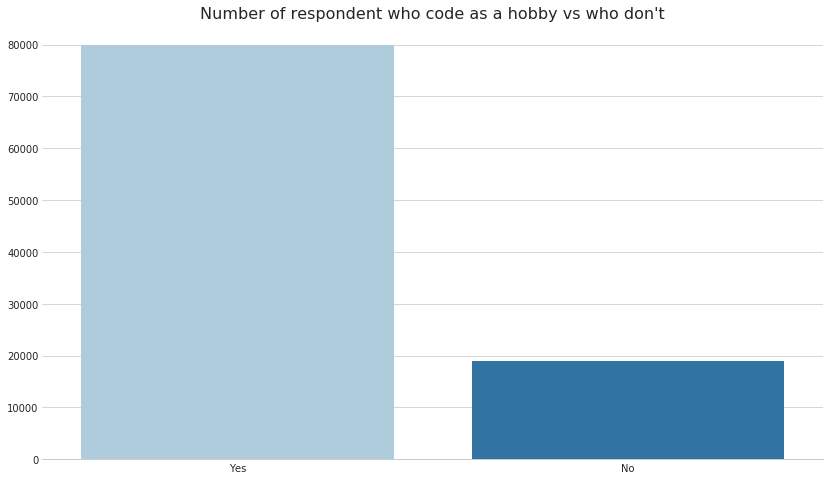

In [7]:
plot_categorical_count(df, 'Hobby', title='Number of respondent who code as a hobby vs who don\'t')

> Majority of the respondants code as a hobby.

# Open Source contributour

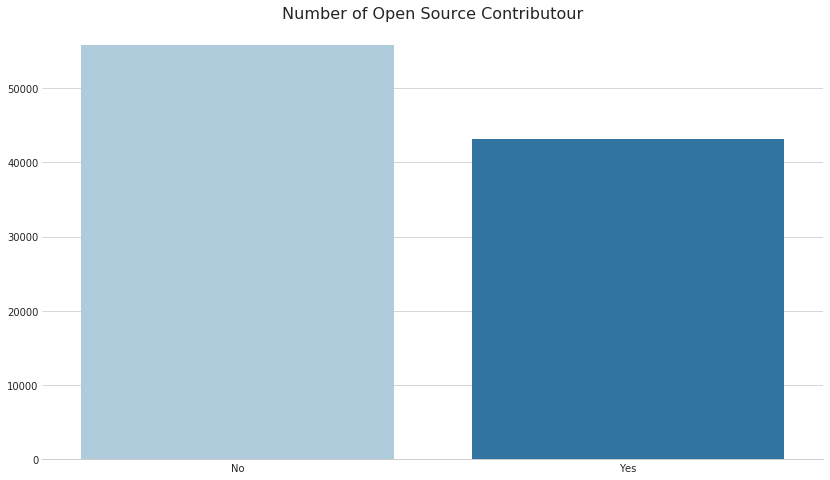

In [8]:
plot_categorical_count(df, 'OpenSource', title='Number of Open Source Contributour')


> The number of respondants who dpn't contribute to Open Source is higher than those who don't 

# Does coding as a hobby affect contributing to Open Source ??

Text(0.5,1,'Number of Open Source Contributour')

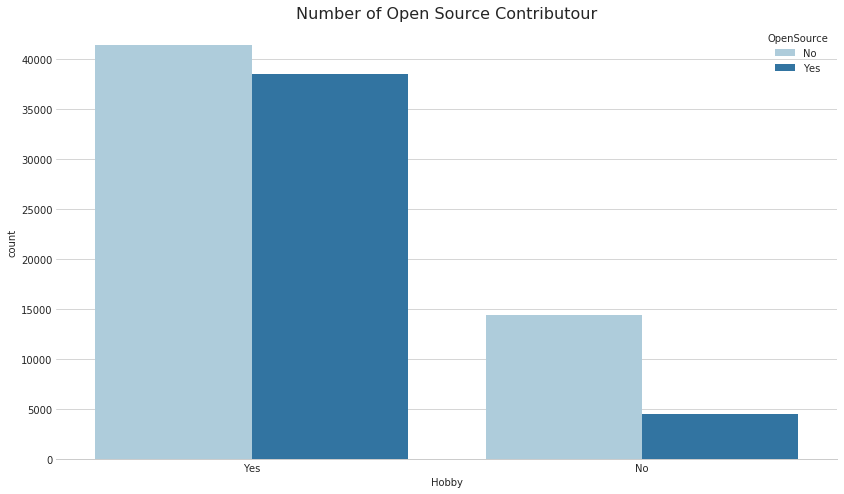

In [9]:
open_source_count = df['OpenSource'].value_counts()

plt.figure(figsize=(14, 8))
sns.countplot(df['Hobby'], palette='Paired', hue=df['OpenSource'])
sns.despine(left=True)
plt.title('Number of Open Source Contributour', fontsize=16)

> Thse who code as a hobby are more likely to contribute to Open source

# Student or Not ?

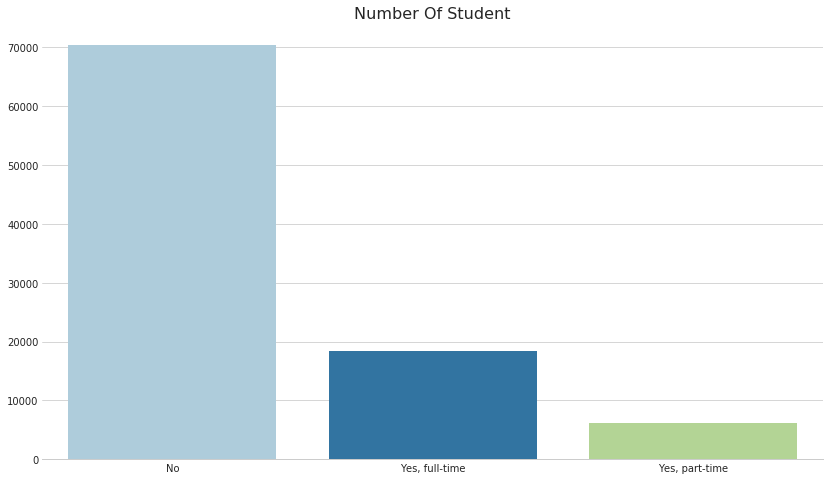

In [10]:
plot_categorical_count(df, 'Student', title='Number Of Student', limit=3)

 > Majority of respondants were not student.

# Employement Status

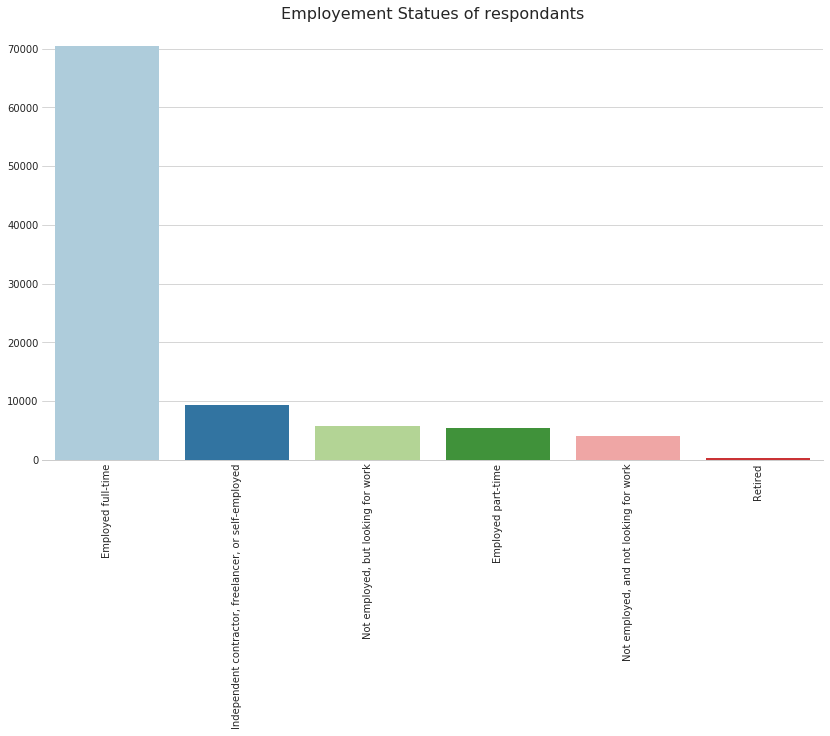

In [11]:
plot_categorical_count(df, 'Employment', title='Employement Statues of respondants', limit=6, xtick_rotation='vertical')

> Majority of respondants are working full time

# Male vs Female

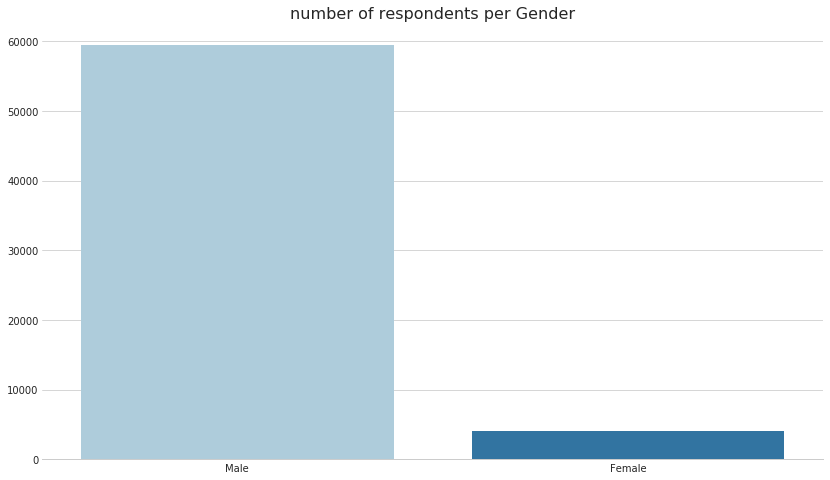

In [12]:
plot_categorical_count(df, 'Gender', title='number of respondents per Gender')

> We see that the majority of respondents were male

# When do developpers wake up ?

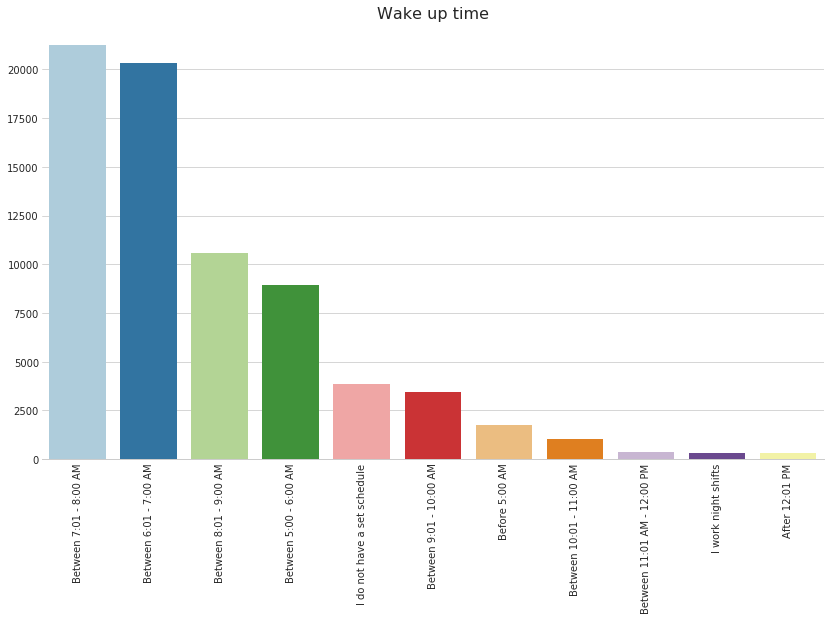

In [13]:
plot_categorical_count(df, 'WakeTime', title='Wake up time', limit=11, xtick_rotation='vertical')

> We can see that the majority of developpers wake up between 6:01 - 8:00 Am
> There is also a good amount of developper who wake up between 8:01 - 9:00 AM and between 5:00 - 6:00

# Respondents majors

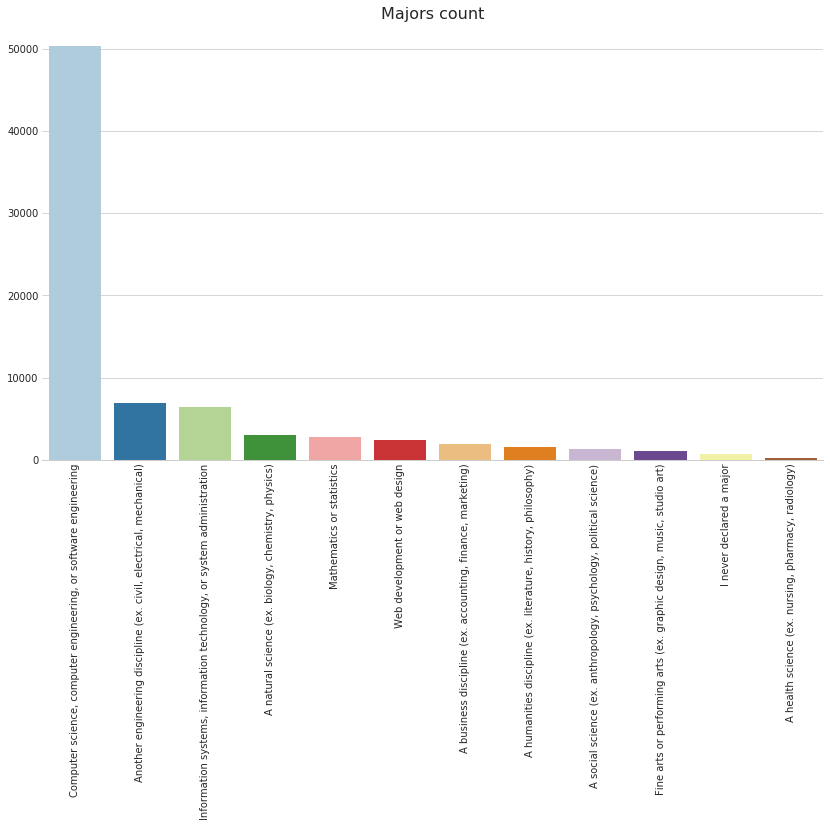

In [14]:
plot_categorical_count(df, 'UndergradMajor', 'Majors count', limit=100, xtick_rotation='vertical')

> As expected, the computer-related majors are dominating in the Stack overflow community

# Professional life in the Top 10 Countries
* In this section, we'll get a deeper look at the professional life in the top 10 countries participating in the survey

# Job Satisfaction in the top 10 countries

In [16]:
top_10_list = list(df['Country'].value_counts()[:10].index)
def st_not(row):
    if 'dissatisfied' in row:
        return 'Dissatisfied'
    return 'Satisfied'

df['sat_or_not'] = df['JobSatisfaction'].dropna().map(st_not)
#sat = df[np.logical_or(np.logical_or(df['JobSatisfaction'] == 'Moderately satisfied', df['JobSatisfaction'] == 'Extremely satisfied'), df['JobSatisfaction'] == 'Slightly satisfied')]
top10_df = df.where(df['Country'].isin(top_10_list))
sat_count = pd.DataFrame()
names = []
sat = []
disat = []
for name, group in top10_df.groupby('Country'):
    names.append(name)
    country_count = group['sat_or_not'].value_counts()
    sat.append(country_count['Satisfied'])
    
    #sat_count['Satisfied'] = country_count['Satisfied']
    #sat_count['Dissatisfied'] = country_count['Dissatisfied']
sat_count['Country'] = names
    #plt.figure(figsize=(14, 8))
#plt.plot(sat_count)
#sns.countplot(data=df, x='Country', hue='sat_or_not', palette='Paired', order=df['Country'].value_counts()[:10].index)
#sns.despine(left=True)
#plt.xticks(rotation='vertical')
sat_count

,Country
0,Australia
1,Brazil
2,Canada
3,France
4,Germany
5,India
6,Poland
7,Russian Federation
8,United Kingdom
9,United States


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

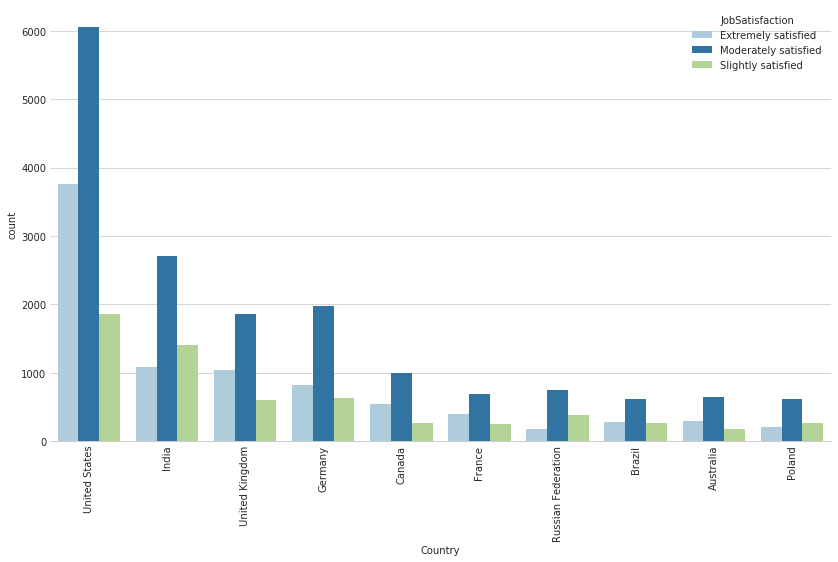

In [17]:
df['JobSatisfaction'].value_counts()
sat = df[np.logical_or(np.logical_or(df['JobSatisfaction'] == 'Moderately satisfied', df['JobSatisfaction'] == 'Extremely satisfied'), df['JobSatisfaction'] == 'Slightly satisfied')]

plt.figure(figsize=(14, 8))
sns.countplot(data=sat, x='Country', hue='JobSatisfaction', palette='Paired', order=sat['Country'].value_counts()[:10].index)
sns.despine(left=True)
plt.xticks(rotation='vertical')

> In the Top 10 countires, Developpers are moderatly satisfied with their jobs

# Career Satisfaction

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

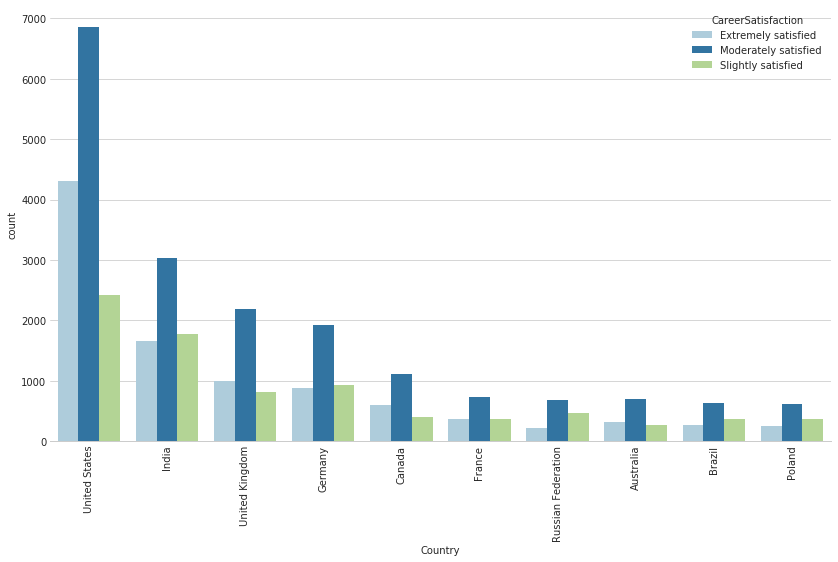

In [18]:
df['CareerSatisfaction'].value_counts()
sat = df[np.logical_or(np.logical_or(df['CareerSatisfaction'] == 'Moderately satisfied', df['CareerSatisfaction'] == 'Extremely satisfied'), df['CareerSatisfaction'] == 'Slightly satisfied')]

plt.figure(figsize=(14, 8))
sns.countplot(data=sat, x='Country', hue='CareerSatisfaction', palette='Paired', order=sat['Country'].value_counts()[:10].index)
sns.despine(left=True)
plt.xticks(rotation='vertical')

# Salaries

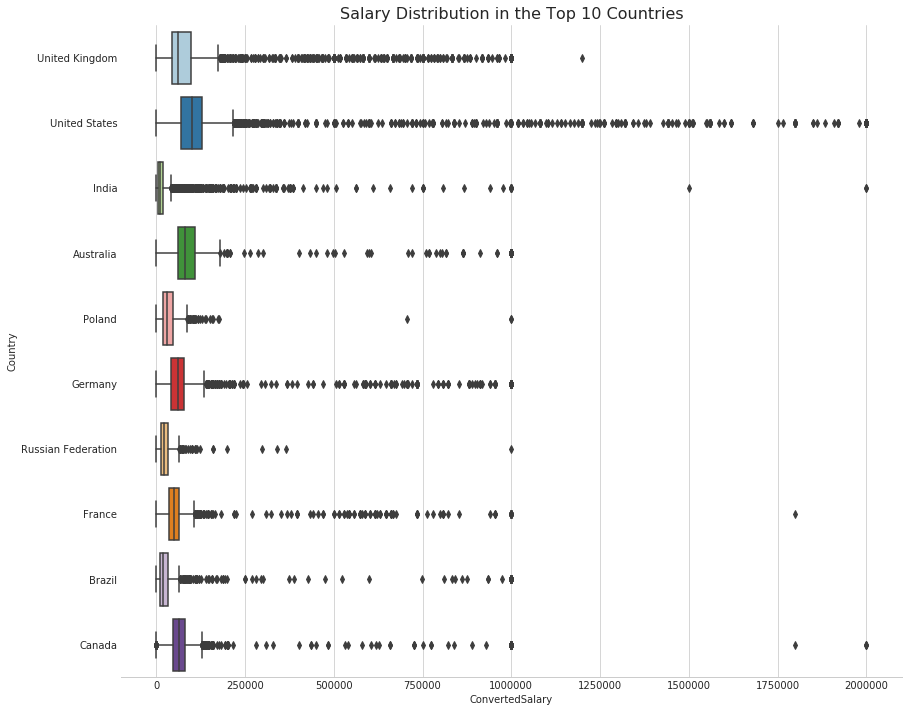

In [19]:
plt.figure(figsize=(14, 12))
df_top10 = df.where(df['Country'].isin(top_10_list))

sns.boxplot(data=df_top10, x='ConvertedSalary', y='Country', palette='Paired')
plt.title('Salary Distribution in the Top 10 Countries', fontsize=16)
sns.despine(left=True)

> We see that USA developpers are the most paid, while indian developpers are the worst.

# Productivity time

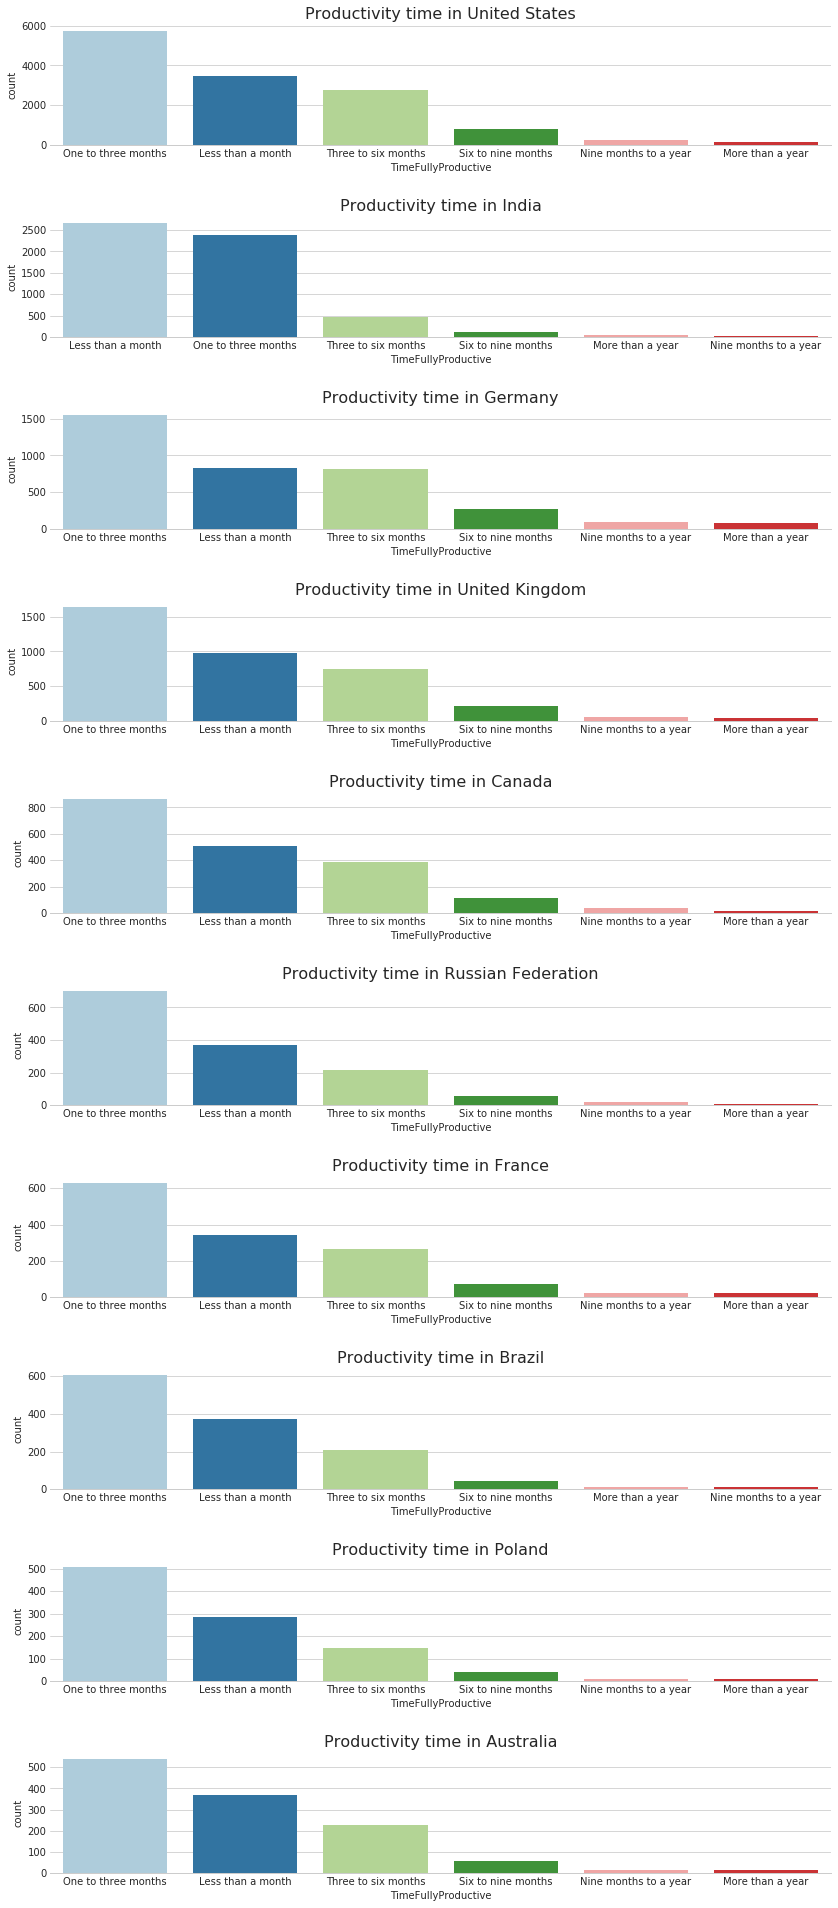

In [20]:
fig, axes = plt.subplots(10, 1, figsize=(14, 34))

for ax, country in zip(axes, top_10_list):
    data = df[df['Country'] == country]
    sns.countplot(data=data, x='TimeFullyProductive', palette='Paired', ax=ax, order=data['TimeFullyProductive'].value_counts().index)
    ax.set_title('Productivity time in {}'.format(country), fontsize=16)
    #plt.xticks(rotation='vertical')
    sns.despine(left=True)
plt.subplots_adjust(hspace=.6)

# Years coding professionally

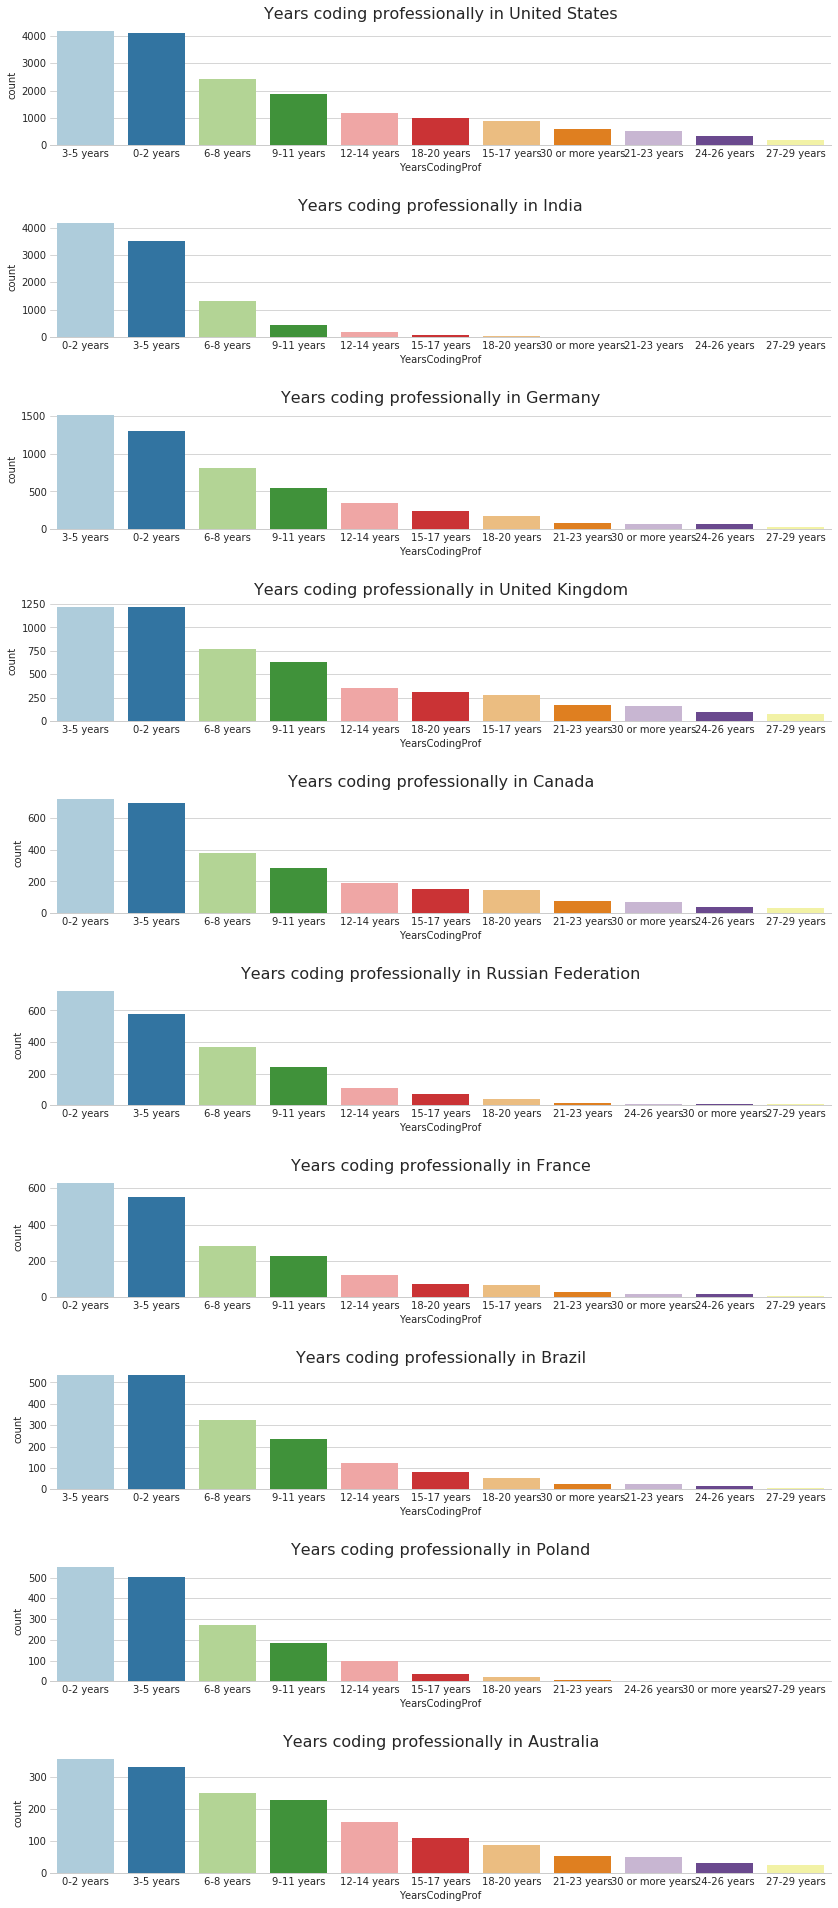

In [21]:
fig, axes = plt.subplots(10, 1, figsize=(14, 34))

for ax, country in zip(axes, top_10_list):
    data = df[df['Country'] == country]
    sns.countplot(data=data, x='YearsCodingProf', palette='Paired', ax=ax, order=data['YearsCodingProf'].value_counts().index)
    ax.set_title('Years coding professionally in {}'.format(country), fontsize=16)
    #plt.xticks(rotation='vertical')
    sns.despine(left=True)
plt.subplots_adjust(hspace=.6)

# Importance of the industry to work in

Text(0.5,1,'Importance of Industry to assess potential job')

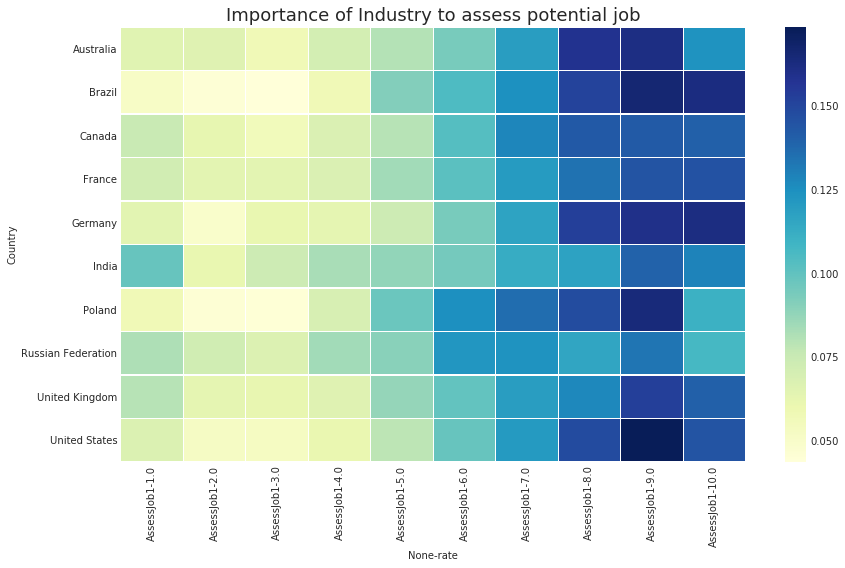

In [30]:
top10_df = df.where(df['Country'].isin(top_10_list))
plot_heatmap(top10_df, 'AssessJob1')    
plt.title('Importance of Industry to assess potential job', fontsize=18)

> *  We can see that the industry to work in is an important factor for developpers to assess a potential job oppotunity.
* While indian developpers also value the importance for the industry to work in, they seems to give the less importance to the industry to work in.

# Importance of The financial performance or funding status of the company or organization

Text(0.5,1,'Importance of Industry to assess potential job')

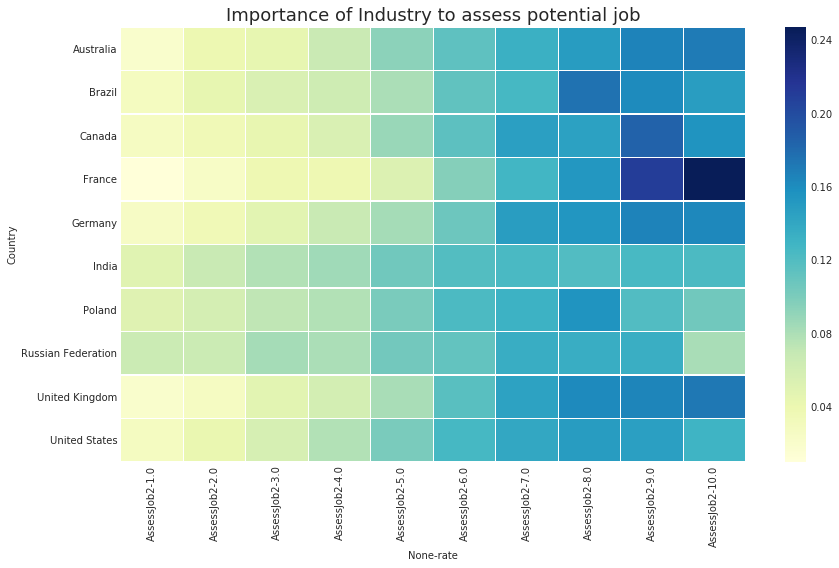

In [31]:
plot_heatmap(top10_df, 'AssessJob2')    
plt.title('Importance of financial performance to assess potential job', fontsize=18)

> * We can see that the financial statut of the company is somewhat important to developpers in the top 10 country.
* French develoopers seems to give the more importance to the financial statut of the company than developpers in the other 10 country 

# Importance of The specific department or team to be working on


Text(0.5,1,'Importance of the department or team to be working on')

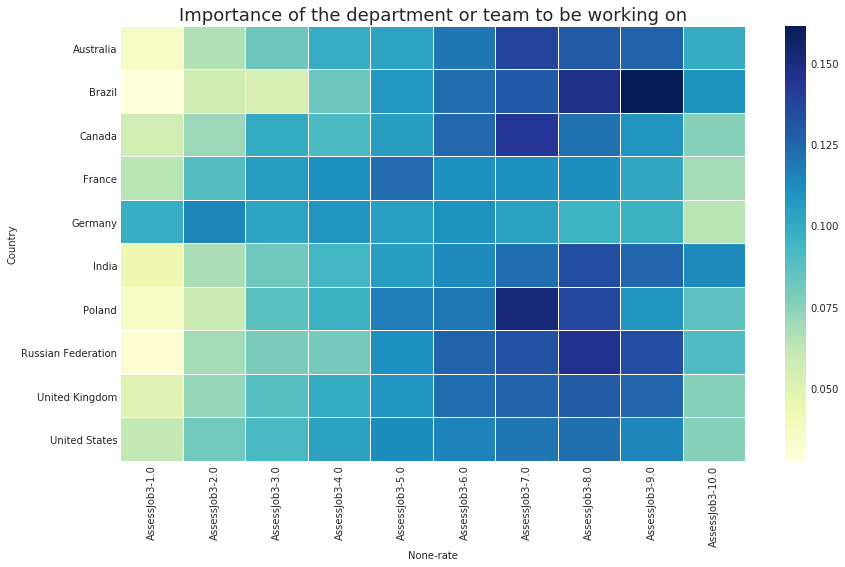

In [22]:
plot_heatmap(top10_df, 'AssessJob3')    
plt.title('Importance of the department or team to be working on', fontsize=18)

> * We can see that the importance of the departement or the team to be working in is not high in the 10 countries.
* German developpers give the less importance to the departement or the team to be working in.
* Brazilian developpers give the most importance to the departement or the team to be working in.

In [20]:
schema

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order of survey response time)
1,Hobby,Do you code as a hobby?
2,OpenSource,Do you contribute to open source projects?
3,Country,In which country do you currently reside?
4,Student,"Are you currently enrolled in a formal, degree-granting college or university program?"
5,Employment,Which of the following best describes your current employment status?
6,FormalEducation,Which of the following best describes the highest level of formal education that you’ve completed?
7,UndergradMajor,You previously indicated that you went to a college or university. Which of the following best describes your main field of study (aka 'major')
8,CompanySize,Approximately how many people are employed by the company or organization you work for?
9,DevType,Which of the following describe you? Please select all that apply.


# Importance of The languages, frameworks, and other technologies

Text(0.5,1,'Importance of Industry to assess potential job')

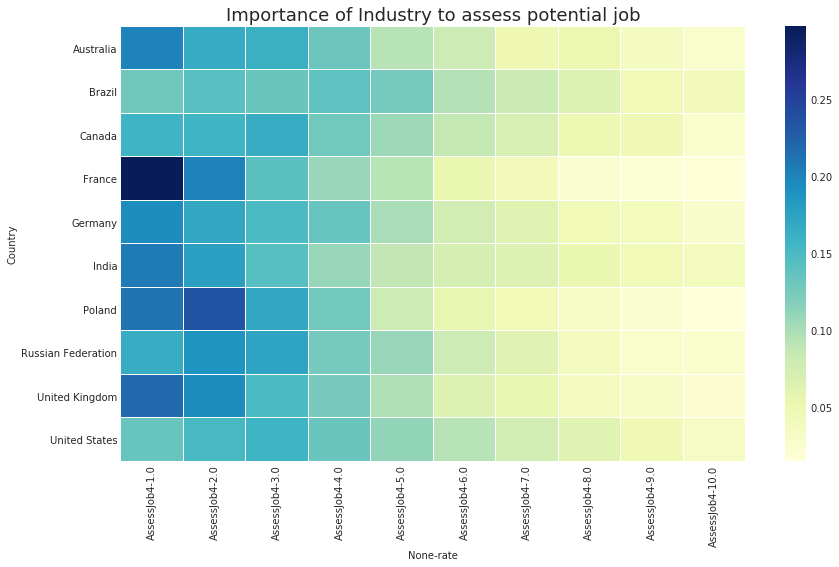

In [23]:
plot_heatmap(top10_df, 'AssessJob4')    
plt.title('Importance of Industry to assess potential job', fontsize=18)

# Importance of The compensation and benefits offered

Text(0.5,1,'Importance of Industry to assess potential job')

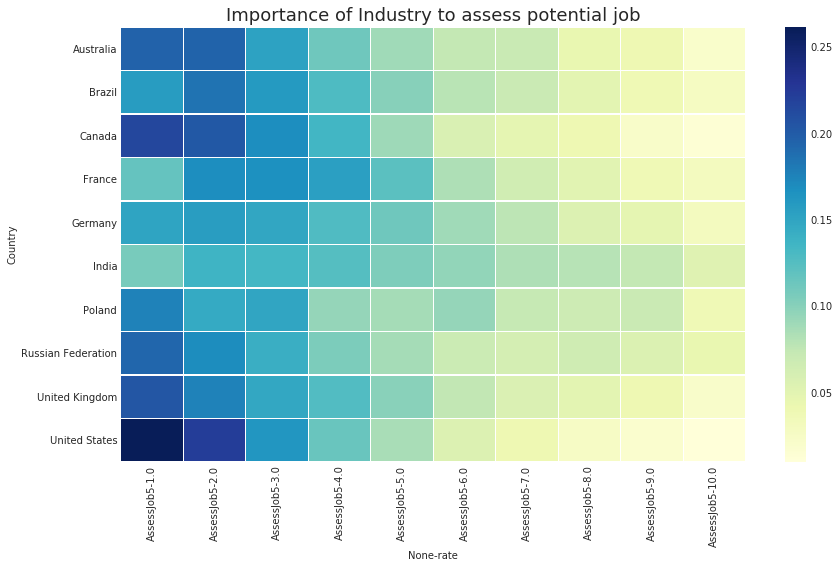

In [24]:
plot_heatmap(top10_df, 'AssessJob5')    
plt.title('Importance of Industry to assess potential job', fontsize=18)

# Importance of The office environment or company culture

Text(0.5,1,'Importance of Industry to assess potential job')

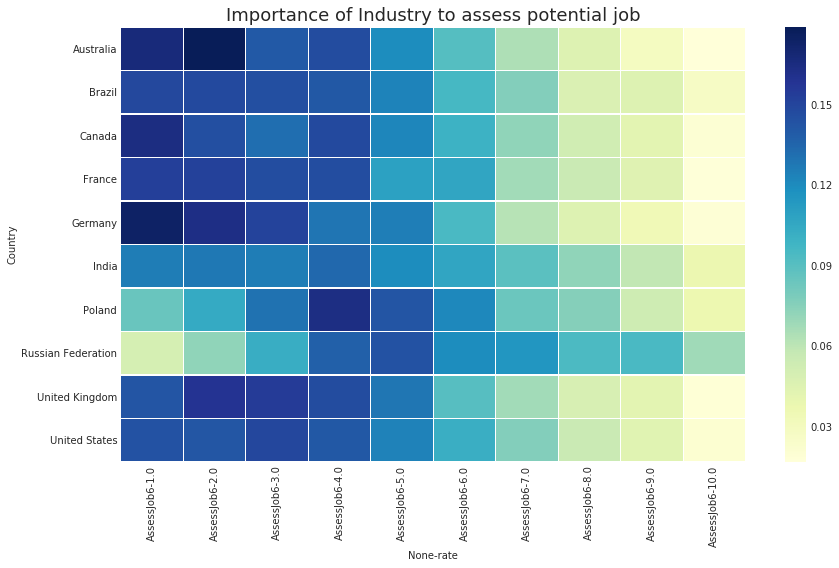

In [25]:
plot_heatmap(top10_df, 'AssessJob6')    
plt.title('Importance of Industry to assess potential job', fontsize=18)

# Importance of The opportunity to work from home/remotely

Text(0.5,1,'Importance of Industry to assess potential job')

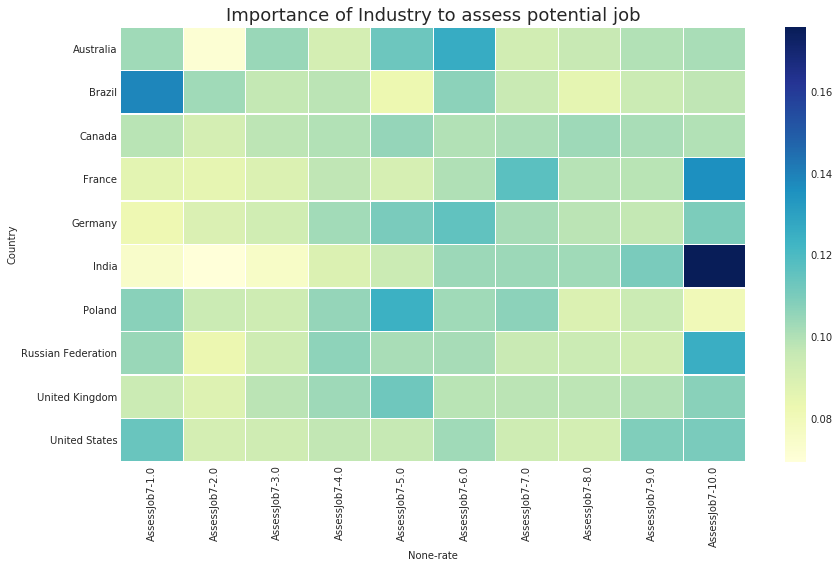

In [26]:
plot_heatmap(top10_df, 'AssessJob7')    
plt.title('Importance of Industry to assess potential job', fontsize=18)

# Importance of Opportunities for professional development

Text(0.5,1,'Importance of Industry to assess potential job')

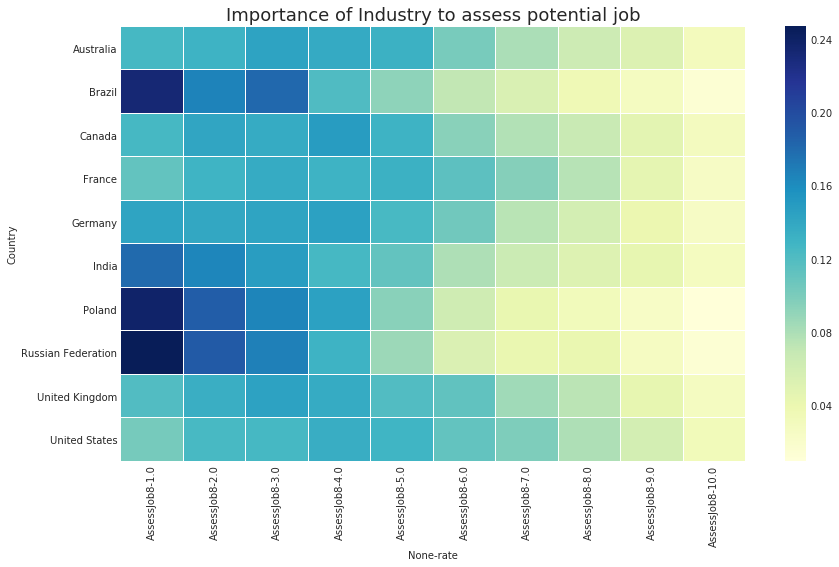

In [27]:
plot_heatmap(top10_df, 'AssessJob8')    
plt.title('Importance of Industry to assess potential job', fontsize=18)

# Importance of The diversity of the company or organization

Text(0.5,1,'Importance of Industry to assess potential job')

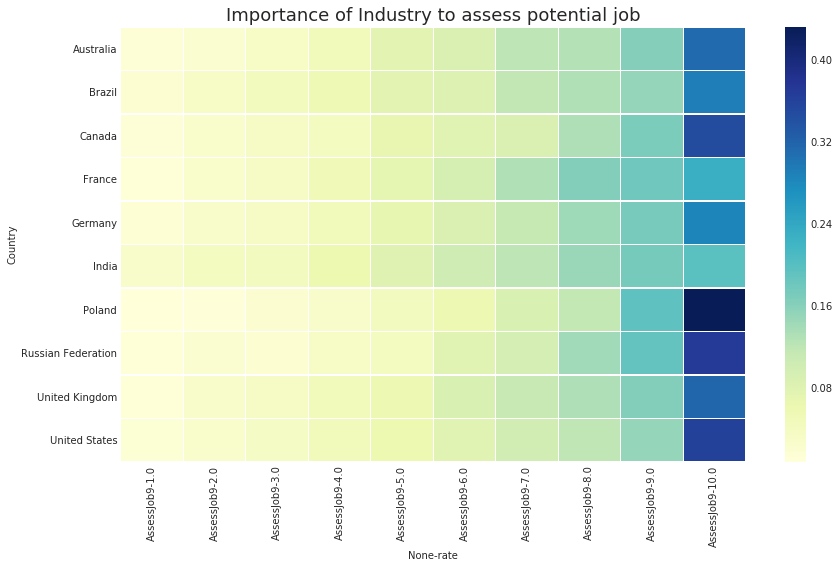

In [28]:
plot_heatmap(top10_df, 'AssessJob9')    
plt.title('Importance of Industry to assess potential job', fontsize=18)

# Importance of How widely used or impactful the product or service

Text(0.5,1,'Importance of Industry to assess potential job')

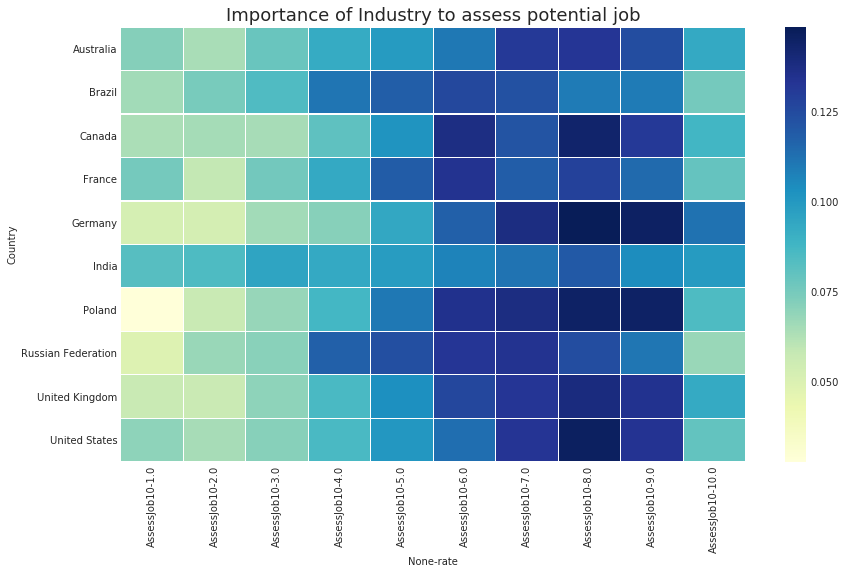

In [29]:
plot_heatmap(top10_df, 'AssessJob10')    
plt.title('Importance of Industry to assess potential job', fontsize=18)

# Personal life in the top 10 countries
* In this section, we'll try to get a deeper look at the developers peronal life in the top 10 countries taking the survey

# Wake up time in the top 10 countries

In [ ]:
earlybirds = df[np.logical_or(np.logical_or(df['WakeTime'] == 'Between 7:01 - 8:00 AM', df['WakeTime'] == 'Between 6:01 - 7:00 AM'), df['WakeTime'] == 'Between 5:00 - 6:00 AM')] 

plt.figure(figsize=(14, 8))
sns.countplot(data=earlybirds, x='Country', hue='WakeTime', palette='Paired', order=earlybirds['Country'].value_counts()[:10].index)
sns.despine(left=True)
plt.xticks(rotation='vertical')


> We can see that most developpers in the top 10 countries wake up between 6 AM and 8 AM

# Hours spent on the computer

In [ ]:
sat = df
plt.figure(figsize=(14, 8))
sns.countplot(data=sat, x='Country', hue='HoursComputer', palette='Paired', order=sat['Country'].value_counts()[:10].index)
sns.despine(left=True)
plt.xticks(rotation='vertical')

> Most developpers spent between 5 and 12 hours on the computer.

# Hours outside

In [ ]:
sat = df
plt.figure(figsize=(14, 8))
sns.countplot(data=sat, x='Country', hue='HoursOutside', palette='Paired', order=sat['Country'].value_counts()[:10].index)
sns.despine(left=True)
plt.xticks(rotation='vertical')

> * Except for india, in the other top 9 countries, most developpers are spending less than 2 hours outside.
> * In india, We can see that there is a high number of developpers who spent 3 to 4 hours outside, event the number of those who spent more than 4 hours outside is high if we compare it to the other countries.

# Who's skipping their meals ?

In [ ]:
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x = 'Country', hue='SkipMeals', palette='Paired', order=df['Country'].value_counts()[:10].index)
sns.despine(left=True)

> We can see the same pattern fot the top 10 countries, in which the majority of developpers never skip any meals

# Exercicing

In [ ]:
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='Country', hue='Exercise', palette='Paired', order=df['Country'].value_counts()[:10].index)
sns.despine(left=True)

> * Developpers do not typically exercice, or are excercicing for 1-2 times a week which is not enough.